# Plot-1: main89 and DP8 Event Weight
Plot the event weight distribution of main89 and DP8

## 1. Import Packages

In [1]:
# The Python Standard Library
import os
import sys
import time
import datetime
import glob
import multiprocessing as mp

# The Third-Party Library
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import prettytable
import uproot
import pyjet
import importlib

# My Packages
import myhep.particle_information_v2 as mypiv2
import myhep.analytical_function_v2 as myafv2
import myhep.particleinfo_v1 as mypiv1
import myhep.particlefun_v1 as myafv1

# increase figure showing resolution
%config InlineBackend.figure_format = 'retina'

## 2. Load the Data

### 2-1. main89

In [2]:
analyzed_data_Weight_2 = np.load('analysis-1_ckkwl2/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

analyzed_data_Weight_3 = np.load('analysis-1_ckkwl3/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

analyzed_data_Weight_4 = np.load('analysis-1_ckkwl4/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

analyzed_data_Weight_8 = np.load('analysis-1_ckkwl8/ana1_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

In [3]:
print(analyzed_data_Weight_4.files)

['weight']


In [4]:
weight_main89_c1 = analyzed_data_Weight_2['weight']*10000*(10**9)
weight_main89_c2 = analyzed_data_Weight_8['weight']*10000*(10**9)
weight_main89_c3 = analyzed_data_Weight_3['weight']*10000*(10**9)
weight_main89_c4 = analyzed_data_Weight_4['weight']*10000*(10**9)

### 2-2. DP8
8X = DP8_X, where X = 2, 3, 4, and 8

In [5]:
analyzed_data_Weight_82 = np.load('analysis-1_ckkwl82/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

analyzed_data_Weight_83 = np.load('analysis-1_ckkwl83/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

analyzed_data_Weight_84 = np.load('analysis-1_ckkwl84/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

analyzed_data_Weight_88 = np.load('analysis-1_ckkwl88/_ck8_rinv3_Lambdad5_1_Weight.npz', allow_pickle=True)

In [6]:
print(analyzed_data_Weight_84.files)

['weight']


In [7]:
weight_DP8_c1 = analyzed_data_Weight_82['weight']
weight_DP8_c2 = analyzed_data_Weight_88['weight']
weight_DP8_c3 = analyzed_data_Weight_83['weight']
weight_DP8_c4 = analyzed_data_Weight_84['weight']

### 2-3. Check the information of data

#### 1. main89

In [8]:
print("There are {} events in the Case 1 .root file.".format(weight_main89_c1.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_main89_c1)[0]))
print('-'*47)
print("There are {} events in the Case 2 .root file.".format(weight_main89_c2.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_main89_c2)[0]))
print('-'*47)
print("There are {} events in the Case 3 .root file.".format(weight_main89_c3.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_main89_c3)[0]))
print('-'*47)
print("There are {} events in the Case 4 .root file.".format(weight_main89_c4.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_main89_c4)[0]))

There are 278 events in the Case 1 .root file.
Cross section = 0.018933617545427613 pb
-----------------------------------------------
There are 276 events in the Case 2 .root file.
Cross section = 0.018940151320413507 pb
-----------------------------------------------
There are 9952 events in the Case 3 .root file.
Cross section = 0.6731650209317716 pb
-----------------------------------------------
There are 9637 events in the Case 4 .root file.
Cross section = 0.6992070931169873 pb


#### 2. DP8

In [9]:
print("There are {} events in the Case 1 .root file.".format(weight_DP8_c1.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_DP8_c1)[0]))
print('-'*48)
print("There are {} events in the Case 2 .root file.".format(weight_DP8_c2.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_DP8_c2)[0]))
print('-'*48)
print("There are {} events in the Case 3 .root file.".format(weight_DP8_c3.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_DP8_c3)[0]))
print('-'*48)
print("There are {} events in the Case 4 .root file.".format(weight_DP8_c4.shape[0]))
print("Cross section = {} pb".format(np.sum(weight_DP8_c4)[0]))

There are 10000 events in the Case 1 .root file.
Cross section = 0.6403629183769226 pb
------------------------------------------------
There are 10000 events in the Case 2 .root file.
Cross section = 0.6374379992485046 pb
------------------------------------------------
There are 10000 events in the Case 3 .root file.
Cross section = 0.6732006669044495 pb
------------------------------------------------
There are 10000 events in the Case 4 .root file.
Cross section = 0.6992416977882385 pb


#### Conclusion 1: The number of events is strange, it is different from PYTHIA output.

In [10]:
print("Case 1:")
print(weight_DP8_c1)
print('-'*74)
print("Case 2:")
print(weight_DP8_c2)
print('-'*74)
print("Case 3:")
print(weight_DP8_c3)
print('-'*74)
print("Case 4:")
print(weight_DP8_c4)
print('-'*74)

Case 1:
[array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32) ...
 array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32)]
--------------------------------------------------------------------------
Case 2:
[array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32) ...
 array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32)]
--------------------------------------------------------------------------
Case 3:
[array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32) ...
 array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32)]
--------------------------------------------------------------------------
Case 4:
[array([6.810653e-05], dtype=float32) array([0.000

#### Conclusion 2: I don't see the weight = 0 event, but I think there is event with weight = 0.

In [11]:
not0_c1, not0_c2, not0_c3, not0_c4 = [], [], [], []

for i in range(len(weight_DP8_c1)):
    if weight_DP8_c1[i][0] != 0:
        not0_c1.append(i)
        
for i in range(len(weight_DP8_c2)):
    if weight_DP8_c2[i][0] != 0:
        not0_c2.append(i)
        
for i in range(len(weight_DP8_c3)):
    if weight_DP8_c3[i][0] != 0:
        not0_c3.append(i)
        
for i in range(len(weight_DP8_c4)):
    if weight_DP8_c4[i][0] != 0:
        not0_c4.append(i)
        
print("When we excluding the weight = 0 events,")
print("The remaining number of events = {} for Case 1.".format(len(not0_c1)))
print("The remaining number of events = {} for Case 2.".format(len(not0_c2)))
print("The remaining number of events = {} for Case 3.".format(len(not0_c3)))
print("The remaining number of events = {} for Case 4.".format(len(not0_c4)))

When we excluding the weight = 0 events,
The remaining number of events = 9464 for Case 1.
The remaining number of events = 9350 for Case 2.
The remaining number of events = 9952 for Case 3.
The remaining number of events = 9637 for Case 4.


#### Conclusion 3: The results are the same as PYTHIA outputs.

## 3. Plot

#### 1. Event weight for DP8 and main89

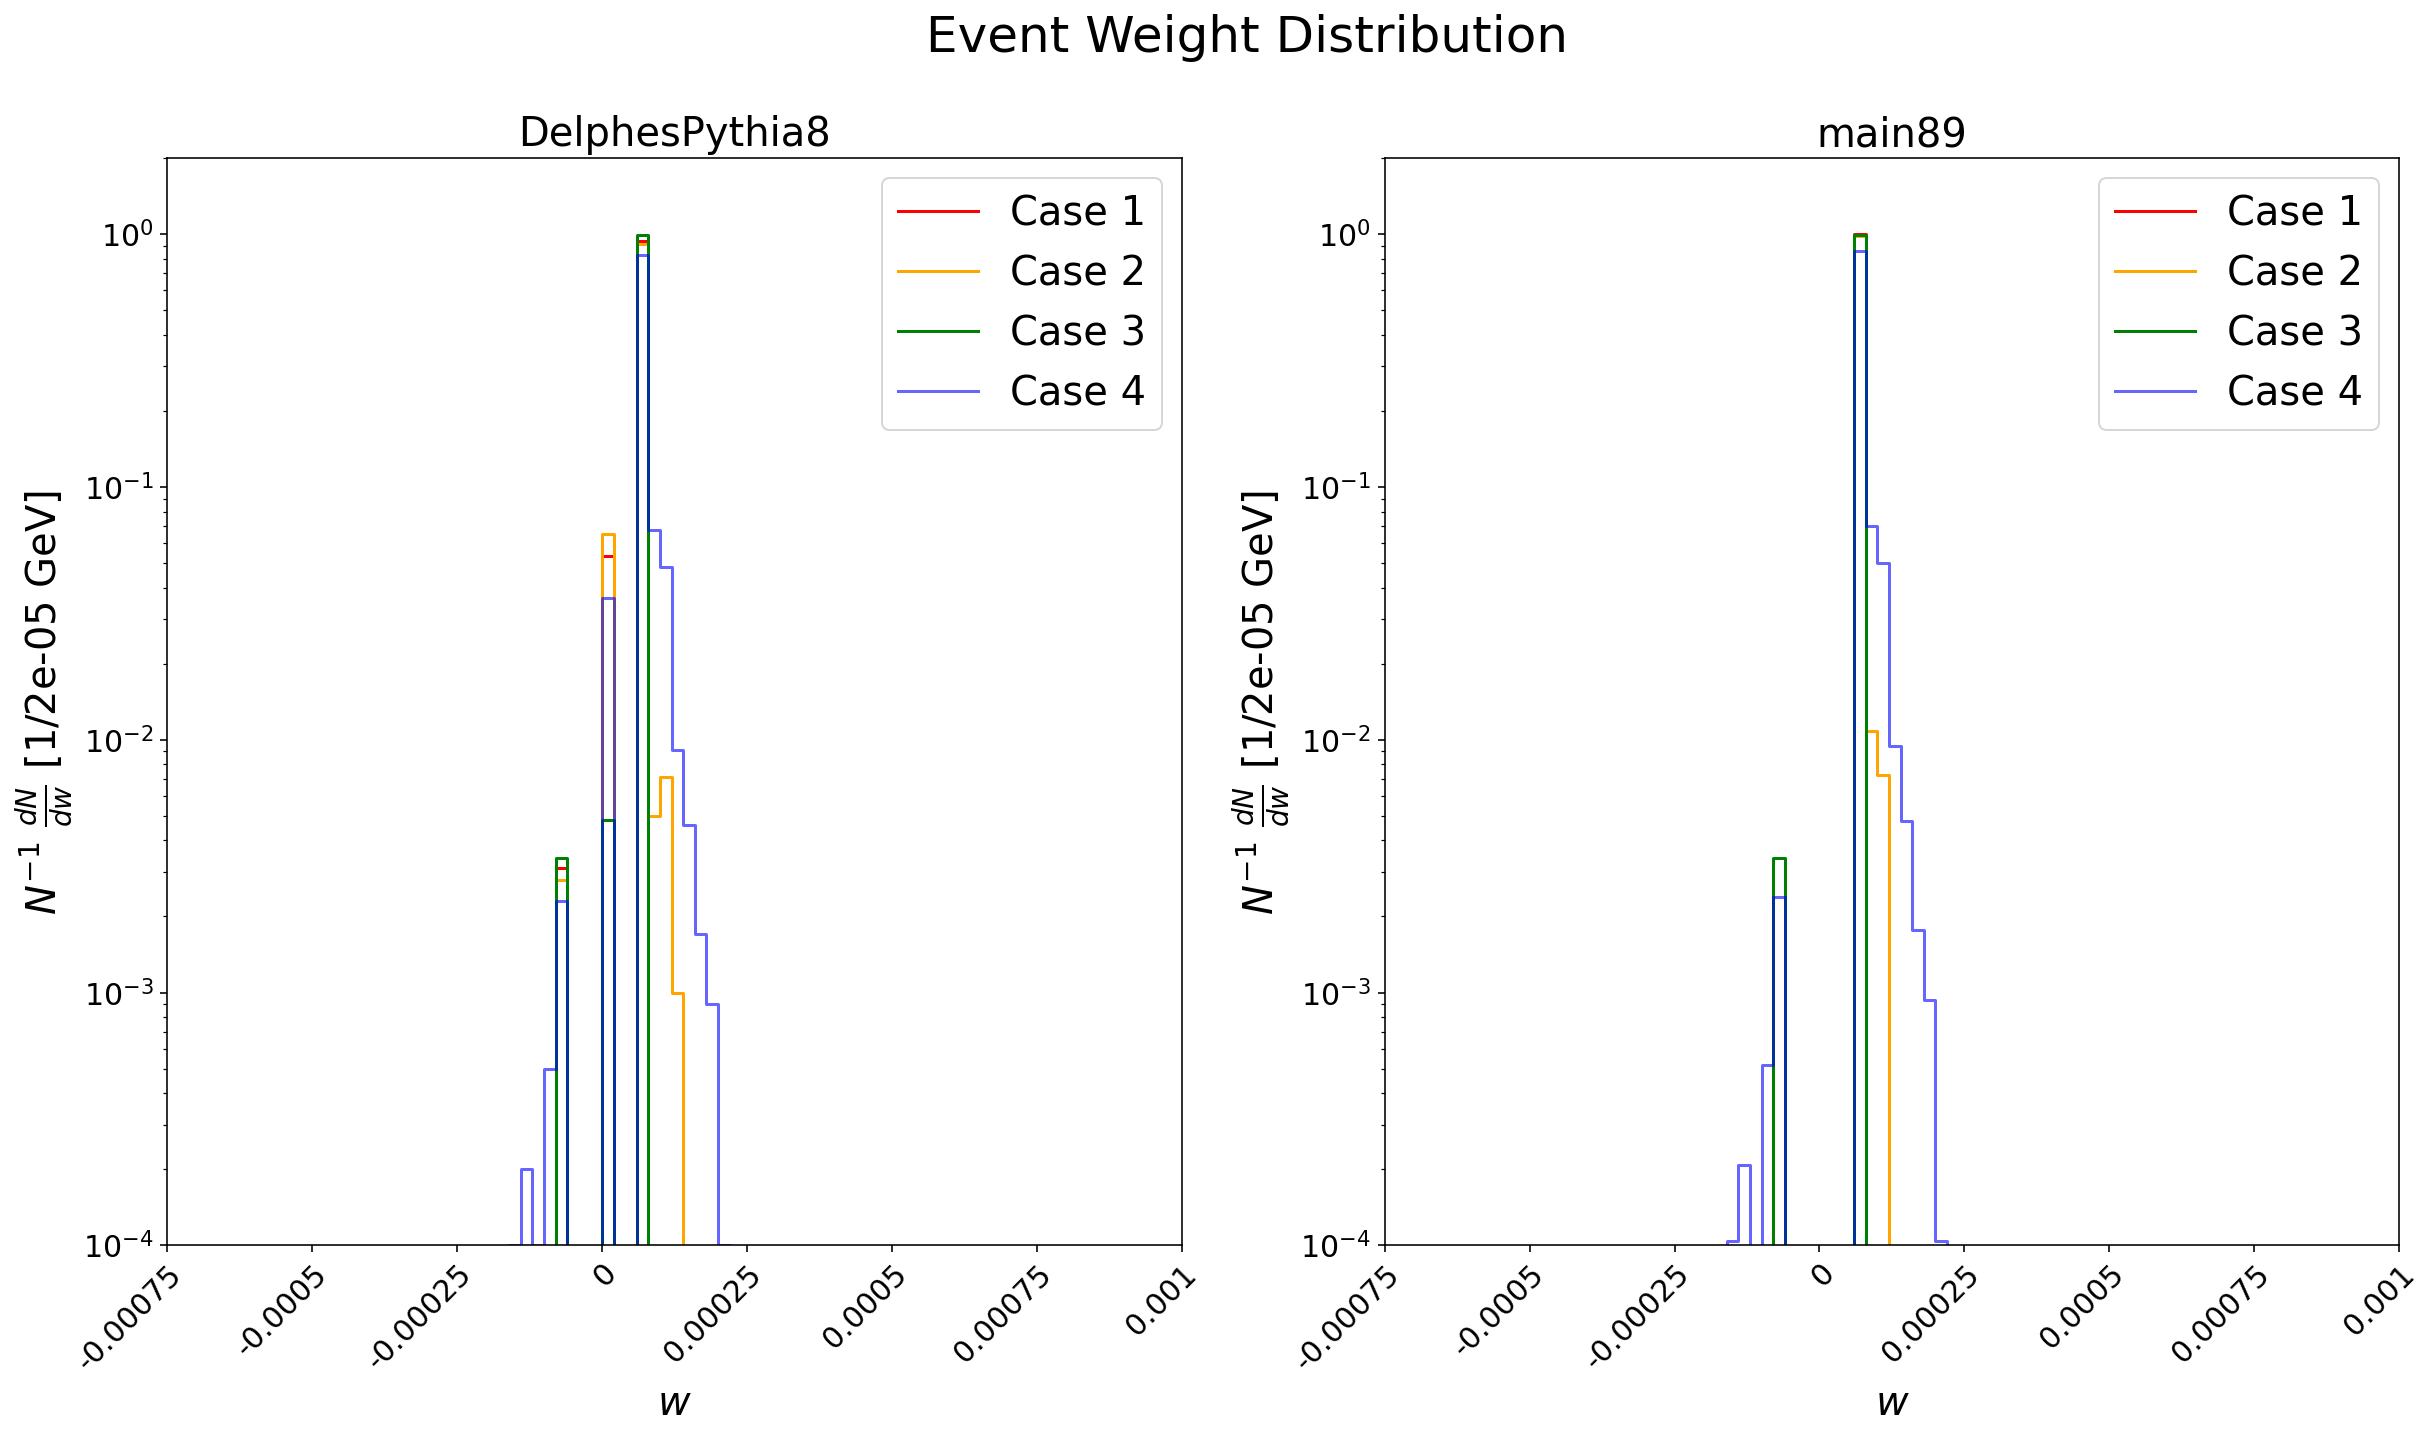

In [17]:
# 1. Figure
fig, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(-0.002, 0.002, 201)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(weight_DP8_c1, bins=binning)
hist0_2, bins0_2 = np.histogram(weight_DP8_c2, bins=binning)
hist0_3, bins0_3 = np.histogram(weight_DP8_c3, bins=binning)
hist0_4, bins0_4 = np.histogram(weight_DP8_c4, bins=binning)

hist1_1, bins1_1 = np.histogram(weight_main89_c1, bins=binning)
hist1_2, bins1_2 = np.histogram(weight_main89_c2, bins=binning)
hist1_3, bins1_3 = np.histogram(weight_main89_c3, bins=binning)
hist1_4, bins1_4 = np.histogram(weight_main89_c4, bins=binning)

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1/np.sum(hist0_1), where='post', color='red', label="Case 1")
axs[0].step(bins0_2[:-1], hist0_2/np.sum(hist0_2), where='post', color='orange', label="Case 2")
axs[0].step(bins0_3[:-1], hist0_3/np.sum(hist0_3), where='post', color='green', label="Case 3")
axs[0].step(bins0_4[:-1], hist0_4/np.sum(hist0_4), where='post', color='blue', alpha=0.6, label="Case 4")

axs[1].step(bins1_1[:-1], hist1_1/np.sum(hist1_1), where='post', color='red', label="Case 1")
axs[1].step(bins1_2[:-1], hist1_2/np.sum(hist1_2), where='post', color='orange', label="Case 2")
axs[1].step(bins1_3[:-1], hist1_3/np.sum(hist1_3), where='post', color='green', label="Case 3")
axs[1].step(bins1_4[:-1], hist1_4/np.sum(hist1_4), where='post', color='blue', alpha=0.6, label="Case 4")

# 4. axes setting
# title and legend
fig.suptitle("Event Weight Distribution", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$N^{-1}\ \\frac{dN}{dw}$ [1/"+str((binning[-1]-binning[0])/(len(binning)-1))+" GeV]"
axs[0].set_title("DelphesPythia8", fontsize=20)
axs[0].set_xlabel("$w$", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("main89", fontsize=20)
axs[1].set_xlabel("$w$", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(-0.00075, 0.001)
axs[0].set_ylim(1/10000, 2)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[0].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_0 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[0].set_xticklabels(xticklabels_0)
axs[1].set_xlim(-0.00075, 0.001)
axs[1].set_ylim(1/10000, 2)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_1 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[1].set_xticklabels(xticklabels_1)
# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.savefig("figures-1/fig3-1_weight_DP8_main89.pdf")
plt.show()

In [18]:
print("DP8:")
print(np.sum(hist0_1), np.sum(hist0_2), np.sum(hist0_3), np.sum(hist0_4))
print('-'*23)
print("main89:")
print(np.sum(hist1_1), np.sum(hist1_2), np.sum(hist1_3), np.sum(hist1_4))

DP8:
10000 10000 10000 10000
-----------------------
main89:
278 276 9952 9637


In [20]:
for i in range(len(weight_main89_c4)):
    if weight_main89_c4[i][0] <= 0:
        print(i, weight_main89_c4[i])

257 [-6.81065379e-05]
318 [-8.89638976e-05]
432 [-7.97503204e-05]
513 [-6.81065379e-05]
744 [-6.81065379e-05]
750 [-6.81065379e-05]
1092 [-6.81065379e-05]
1202 [-6.81065379e-05]
1402 [-6.81065379e-05]
1552 [-6.81065379e-05]
1997 [-6.81065379e-05]
2115 [-6.81065379e-05]
2659 [-6.81065379e-05]
2699 [-8.55538107e-05]
2761 [-6.81065379e-05]
2934 [-0.00013766]
3363 [-6.81065379e-05]
3790 [-6.81065379e-05]
3940 [-9.64771408e-05]
4069 [-6.81065379e-05]
4398 [-6.81065379e-05]
5030 [-6.81065379e-05]
5509 [-0.00014247]
6378 [-6.81065379e-05]
6521 [-6.81065379e-05]
7141 [-8.82027809e-05]
7469 [-6.81065379e-05]
8368 [-6.81065379e-05]
8555 [-0.0001375]
9449 [-6.81065379e-05]
9625 [-8.93522181e-05]


#### Conclusion 1: The area of distributions is correct!

#### Conclusion 2: There are some event weights to be negative value.

#### 2. Event weight for DP8 vs. main89

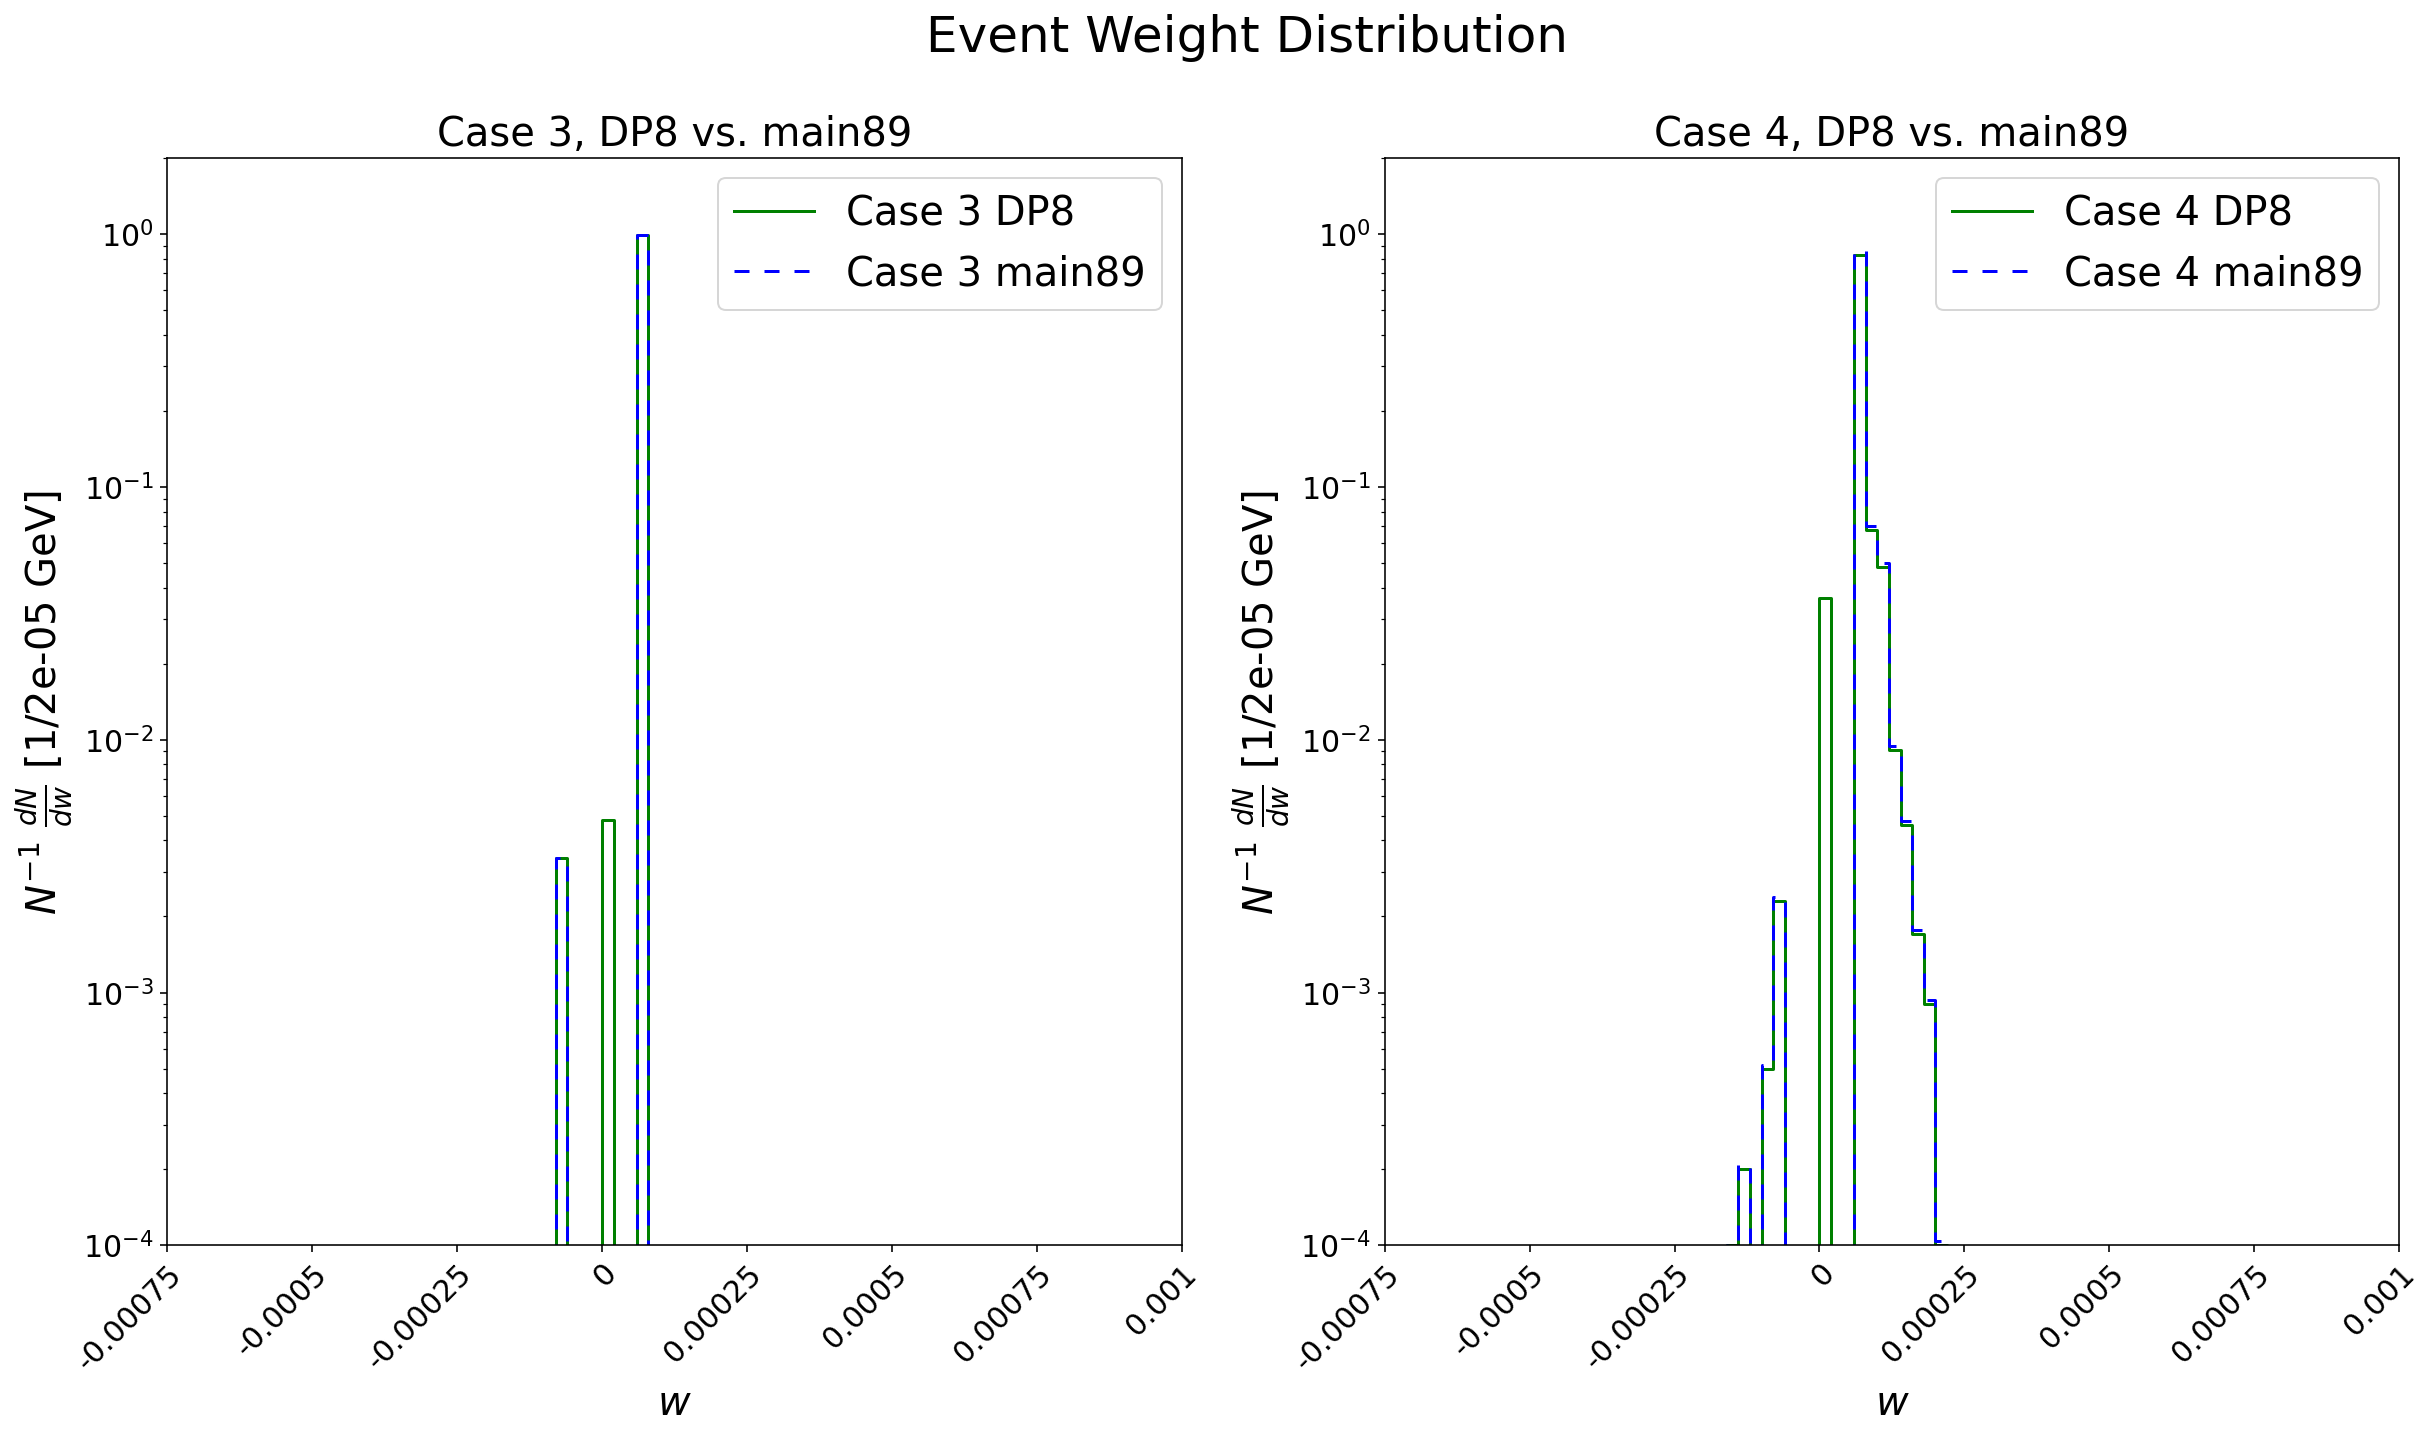

In [21]:
# 1. Figure
fig1_2, axs = plt.subplots(1, 2, figsize=(20,10))
binning = np.linspace(-0.002, 0.002, 201)

################################################################################
# 2. Data
hist0_1, bins0_1 = np.histogram(weight_DP8_c3, bins=binning)
hist0_2, bins0_2 = np.histogram(weight_main89_c3, bins=binning)

hist1_1, bins1_1 = np.histogram(weight_DP8_c4, bins=binning)
hist1_2, bins1_2 = np.histogram(weight_main89_c4, bins=binning)

# 3. Plot
axs[0].step(bins0_1[:-1], hist0_1/np.sum(hist0_1), where='post', color='green', label="Case 3 DP8")
axs[0].step(bins0_2[:-1], hist0_2/np.sum(hist0_2), where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 3 main89")

axs[1].step(bins1_1[:-1], hist1_1/np.sum(hist1_1), where='post', color='green', label="Case 4 DP8")
axs[1].step(bins1_2[:-1], hist1_2/np.sum(hist1_2), where='post',
            color='blue', linestyle=(0, (5, 5)), label="Case 4 main89")

# 4. axes setting
# title and legend
fig1_2.suptitle("Event Weight Distribution", fontsize=25)
axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)
# sub-title and x & y labels
ylabel = "$N^{-1}\ \\frac{dN}{dw}$ [1/"+str((binning[-1]-binning[0])/(len(binning)-1))+" GeV]"
axs[0].set_title("Case 3, DP8 vs. main89", fontsize=20)
axs[0].set_xlabel("$w$", fontsize=20)
axs[0].set_ylabel(ylabel, fontsize=20)
axs[1].set_title("Case 4, DP8 vs. main89", fontsize=20)
axs[1].set_xlabel("$w$", fontsize=20)
axs[1].set_ylabel(ylabel, fontsize=20)
# x & y axes limits, scales, and tick
axs[0].set_xlim(-0.00075, 0.001)
axs[0].set_ylim(1/10000, 2)
axs[0].set_yscale('log')
axs[0].tick_params(axis='both', labelsize=15)
axs[0].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_0 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[0].set_xticklabels(xticklabels_0)
axs[1].set_xlim(-0.00075, 0.001)
axs[1].set_ylim(1/10000, 2)
axs[1].set_yscale('log')
axs[1].tick_params(axis='both', labelsize=15)
axs[1].set_xticks([-0.00075, -0.0005, -0.00025, 0.,
                   0.00025, 0.0005, 0.00075, 0.001])
xticklabels_1 = ["-0.00075", "-0.0005", "-0.00025", "$0$",
                 "0.00025", "0.0005", "0.00075", "0.001"]
axs[1].set_xticklabels(xticklabels_1)
# Rotate the tick labels and set their alignment.
plt.setp(axs[0].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.setp(axs[1].get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.savefig("figures-1/fig3-2_weight_DP8_main89.pdf")
plt.show()

In [22]:
print(weight_DP8_c4)
print('='*80)
print(weight_main89_c4)
print('='*80)
print(np.sum(weight_DP8_c4))
print(np.sum(weight_main89_c4))

[array([6.810653e-05], dtype=float32) array([0.00014424], dtype=float32)
 array([6.810653e-05], dtype=float32) ...
 array([6.810653e-05], dtype=float32) array([6.810653e-05], dtype=float32)
 array([6.810653e-05], dtype=float32)]
[array([6.81065379e-05]) array([0.00014424]) array([6.81065379e-05]) ...
 array([6.81065379e-05]) array([6.81065379e-05]) array([6.81065379e-05])]
[0.6992417]
[0.69920709]


#### Conclusion: The event weight distributions of DP8 are the same as main89 for Case 3 and 4.